In [32]:
import numpy
from matplotlib import pyplot
import sympy
%matplotlib inline

In [33]:
sympy.init_printing()

In [34]:
x = sympy.symbols('x')

In [35]:
x

In [36]:
5 * x

In [37]:
x, nu, t = sympy.symbols('x nu t')  

In [38]:
nu

In [39]:
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * numpy.pi)**2 / (4 * nu * (t + 1))))

In [40]:
phi

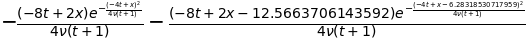

In [41]:
phiprime=phi.diff(x)
phiprime

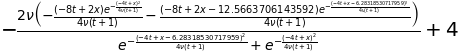

In [42]:
u = -2 * nu *phiprime/phi +4
u

In [43]:
from sympy.utilities.lambdify import lambdify

In [44]:
u_lamb = lambdify((t, x, nu), u)


In [45]:
u_lamb(1, 4, 3)

In [55]:
nx = 101
L = 2* numpy.pi
dx = L/ (nx-1)
nu = 0.07
sigma = 0.1
dt = sigma * dx**2 / nu 
nt = 100

In [56]:
x = numpy.linspace(0.0, L, num = nx)

[       nan 4.07       4.07       4.07       4.07       4.07
 4.07       4.07       4.06999997 4.06999976 4.06999866 4.06999457
 4.06998262 4.06995349 4.06989186 4.06977531 4.06957393 4.06925068
 4.06876233 4.06806098 4.06709571 4.0658144  4.06416537 4.06209893
 4.05956861 4.05653221 4.05295245 4.04879753 4.04404134 4.03866351
 4.0326494  4.02598979 4.01868067 4.01072278 4.0021213  3.99288532
 3.98302744 3.97256335 3.96151133 3.9498919  3.9377274  3.92504164
 3.91185957 3.89820695 3.88411013 3.86959575 3.85469057 3.83942123
 3.82381416 3.80789536 3.79169034 3.775224   3.75852053 3.74160338
 3.72449519 3.70721773 3.68979192 3.67223778 3.65457442 3.63682005
 3.61899198 3.60110663 3.58317954 3.56522539 3.54725804 3.52929051
 3.51133505 3.49340314 3.47550553 3.45765226 3.43985269 3.42211553
 3.40444889 3.38686026 3.3693566  3.35194432 3.3346293  3.31741698
 3.30031232 3.28331984 3.26644369 3.24968759 3.23305493 3.21654876
 3.20017177 3.1839264  3.16781478 3.15183877 3.13599999 3.12029983
 

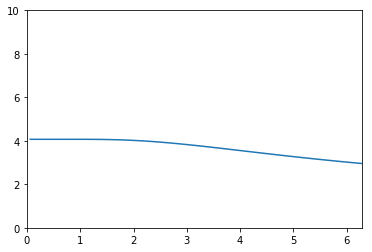

In [60]:
u0 = numpy.empty(nx)
for i in range(nx):
    u0[i] = u_lamb(0, nu, x[i])
print(u0)
pyplot.plot(x, u0)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0);

In [ ]:
u_hist = [u0.copy]
u = u0.copy
for n in range(nt):
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    u[0] = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = u[0]
    u_hist.append[u.copy()]